### Monitoring the localisation of a membrane-tethered PAR-2 RING

Context:
- Assessing the role of the PAR-2 RING domain for driving membrane-binding cooperativity

Results:
- Membrane-tethered RING polarises, implying an interaction with endogenous PAR-2
- Polarity is reduced when the RING structure is disrupted (C56S), or when endogenous PAR-2 polarity is disrupted (par-2 RNAi, par-6 RNAi)

Dependencies:
- Relies on quantification data from _Run/ring_ph_quantify.ipynb_

In [1]:
import os

import matplotlib.pyplot as plt
import numpy as np
import pandas as pd

from src import fold, load_image, nb_setup, raw_data_path, rotated_embryo, save_img

nb_setup()
os.makedirs("Figs", exist_ok=True)
os.makedirs("../../../data/EMBO_source_data", exist_ok=True)

%matplotlib inline

In [2]:
# Import data
df = pd.read_csv("../../../data/ring_ph_embryos_no_pb.csv")
df_wt = df[df.Line == "nwg313"]
df_c56s = df[df.Line == "nwg373"]
df_no_rnai = df[df.Condition == "wt"]
df_ph = df[df.Line == "od58"]
df_quantification = pd.read_csv("../../../data/ring_ph_quantification_no_pb.csv")

### Plot: M:C ratio profiles

In [3]:
def plot_profile(ax, df, c, cond, leg=None):
    if cond is not None:
        frames = df[df["Condition"] == cond]["Frame"]
    else:
        frames = df["Frame"]
    mean_profile, std_profile = (
        np.mean(profs[frames], axis=0),
        np.std(profs[frames], axis=0),
    )
    ax.plot(mean_profile, c=c, label=leg + " (n=%s)" % len(frames))
    ax.fill_between(
        np.arange(len(mean_profile)),
        mean_profile - std_profile,
        mean_profile + std_profile,
        alpha=0.2,
        color=c,
        linewidth=0,
    )


profs = df_quantification.groupby("Frame").apply(
    lambda x: x["Membrane signal"].to_numpy() / x["Cytoplasmic signal"].to_numpy()
)
profs = np.array([fold(x) for x in profs])

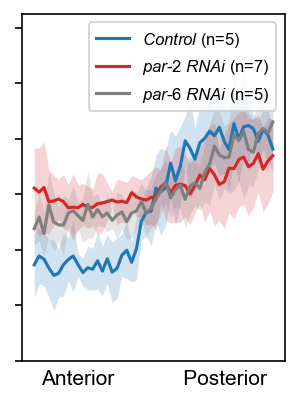

In [4]:
# Create figure
fig, ax = plt.subplots()
plot_profile(ax, df_wt, cond="wt", c="tab:blue", leg=r"$Control$")
plot_profile(ax, df_wt, cond="par2", c="tab:red", leg=r"$par$" + "-" + r"$2\ RNAi$")
plot_profile(ax, df_wt, cond="par6", c="tab:gray", leg=r"$par$" + "-" + r"$6\ RNAi$")

# Format
ax.set_ylim(bottom=0)
ax.set_xlabel("Anterior            Posterior", fontsize=10)
ax.set_xticks([])
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.legend(fontsize=8)
ax.set_ylim(0, 12.5)
ax.set_yticklabels([])
fig.set_size_inches(2.5, 3)
fig.subplots_adjust(left=0.2)

# Save
fig.savefig("Figs/ratio_profile_rnai.png", dpi=600, transparent=True)
fig.savefig("Figs/ratio_profile_rnai.pdf", transparent=True)

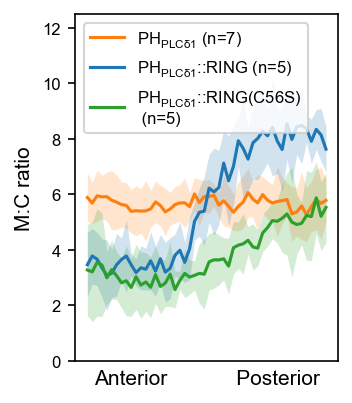

In [5]:
# Create figure
fig, ax = plt.subplots()
plot_profile(ax, df_ph, c="tab:orange", cond=None, leg=r"PH$_{\rm PLC\delta1}$")
plot_profile(ax, df_wt, c="tab:blue", cond="wt", leg=r"PH$_{\rm PLC\delta1}$::RING")
plot_profile(
    ax,
    df_c56s,
    c="tab:green",
    cond="wt",
    leg=r"PH$_{\rm PLC\delta1}$::RING(C56S)" + "\n",
)

# Format
ax.set_ylim(bottom=0)
ax.set_xlabel("Anterior            Posterior", fontsize=10)
ax.set_ylabel("M:C ratio", fontsize=10)
ax.set_xticks([])
ax.set_ylim(0, 12.5)
ax.tick_params(axis="x", labelsize=8)
ax.tick_params(axis="y", labelsize=8)
ax.legend(fontsize=8)
fig.set_size_inches(2.5, 3)
fig.subplots_adjust(left=0.2)

# Save
fig.savefig("Figs/ratio_profile_wt_vs_c56s.png", dpi=600, transparent=True)
fig.savefig("Figs/ratio_profile_wt_vs_c56s.pdf", transparent=True)

# SourceData
df_selected = df[["Frame", "Path", "Line", "Condition"]]
df_figure = df_quantification.set_index("Frame").join(df_selected.set_index("Frame"))
df_figure.to_csv("../../../data/EMBO_source_data/2C.csv", index=False)

### Images

/app/src/../raw_data//Imaging/ring_ph/211117_od58_11161000xfp_tom4,15,60/03
/app/src/../raw_data//Imaging/ring_ph/201111_nwg313_wt_tom4,15,60,eb,20beads/01
/app/src/../raw_data//Imaging/ring_ph/210701_nwg373_wt_tom4,15,60/00
/app/src/../raw_data//Imaging/ring_ph/201111_nwg313_par2_tom4,15,60,eb,beads/03
/app/src/../raw_data//Imaging/ring_ph/201111_nwg313_par6_tom4,15,60,eb,beads/07
2548.4548672128326


2436.319019149299


2549.5633576915325


2489.5376884947073


2451.214827282383


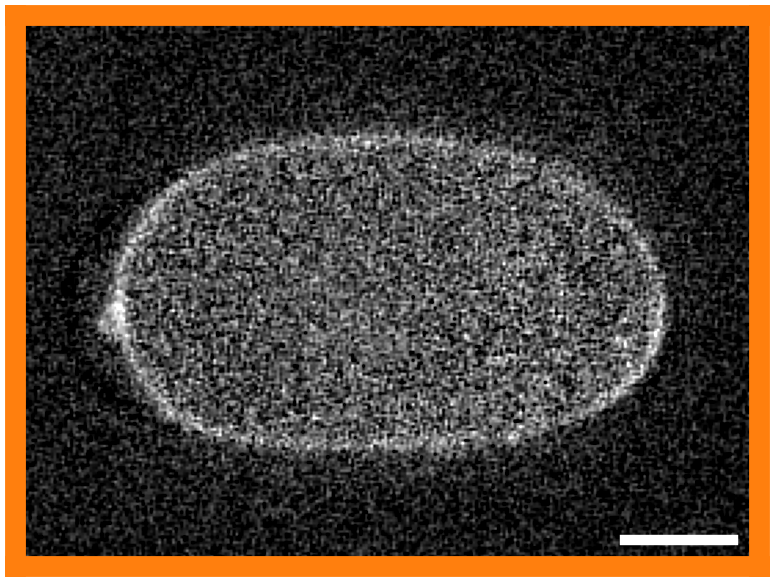

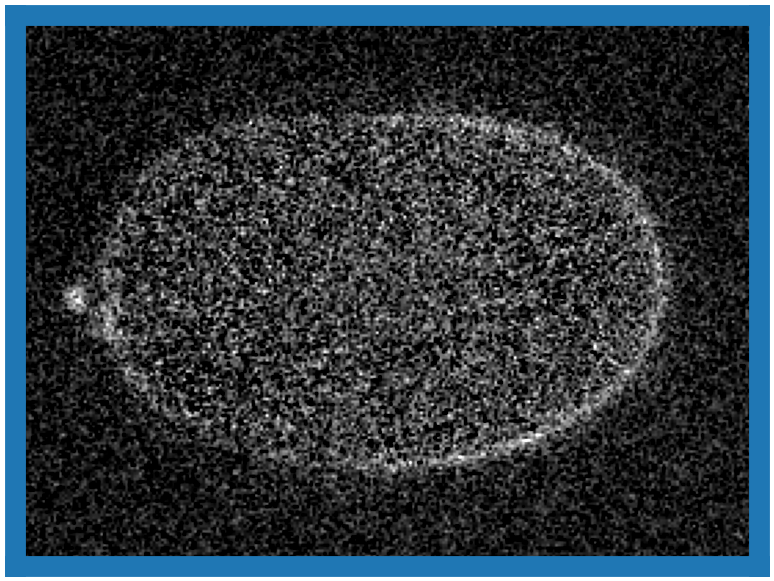

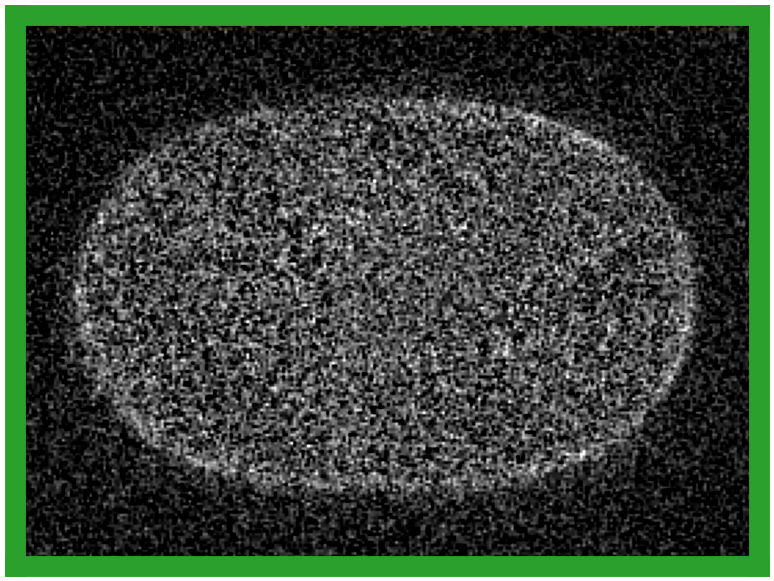

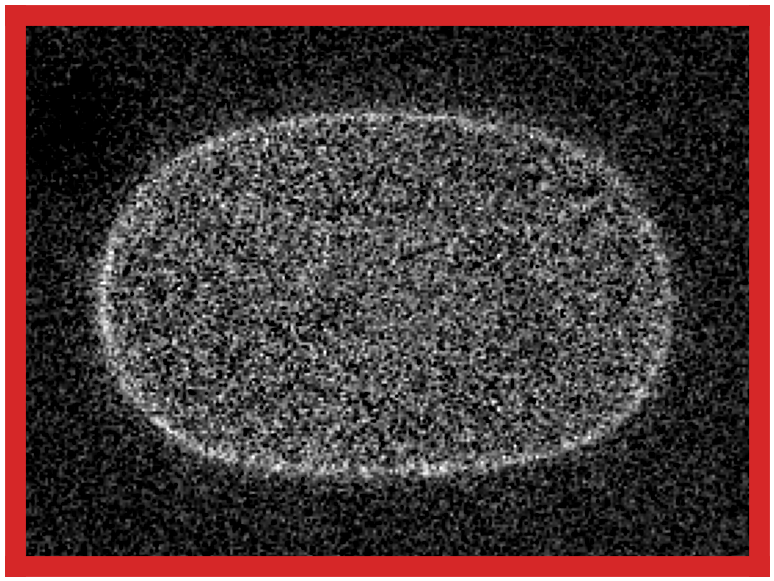

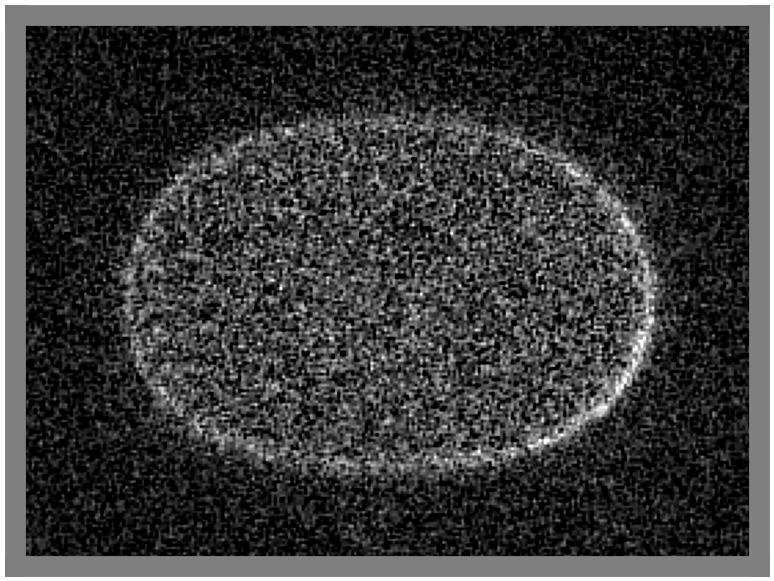

In [6]:
def create_figure(path, scale_bar=False, border=None):
    fig, ax = plt.subplots()
    img = load_image(path + "/af_corrected.tif")
    roi = np.loadtxt(path + "/ROI_fit.txt")
    rotated = rotated_embryo(img, roi, 270, 200, 3)
    print(np.percentile(rotated, 99.9))
    ax.imshow(rotated, vmin=0, vmax=2549.5633576915325, cmap="gray")
    ax.set_xticks([])
    ax.set_yticks([])
    [spine.set_edgecolor(border) for spine in ax.spines.values()]
    [spine.set_linewidth(10) for spine in ax.spines.values()]

    if scale_bar:
        px = 0.255  # pixel size
        bar_length = 10  # microns
        bar_pixels = bar_length / px
        y = rotated.shape[0] - 10
        ax.plot(
            [rotated.shape[1] - 10 - bar_pixels, rotated.shape[1] - 10],
            [y, y],
            color="w",
            linewidth=5,
        )

    return fig, ax


if raw_data_path:
    # Paths
    path_ph = raw_data_path + df_ph.Path.iloc[3]
    path_ph_ring = raw_data_path + df_no_rnai[df_no_rnai.Line == "nwg313"].Path.iloc[1]
    path_ph_ring_c56s = (
        raw_data_path + df_no_rnai[df_no_rnai.Line == "nwg373"].Path.iloc[0]
    )
    path_ph_ring_par2 = raw_data_path + df_wt[df_wt.Condition == "par2"].Path.iloc[2]
    path_ph_ring_par6 = raw_data_path + df_wt[df_wt.Condition == "par6"].Path.iloc[2]

    print(path_ph)
    print(path_ph_ring)
    print(path_ph_ring_c56s)
    print(path_ph_ring_par2)
    print(path_ph_ring_par6)

    # Figure settings
    conditions = {
        "ph": {"path": path_ph, "border": "tab:orange", "scale_bar": True},
        "ph_ring": {"path": path_ph_ring, "border": "tab:blue"},
        "ph_ring_c56s": {"path": path_ph_ring_c56s, "border": "tab:green"},
        "ph_ring_par2": {"path": path_ph_ring_par2, "border": "tab:red"},
        "ph_ring_par6": {"path": path_ph_ring_par6, "border": "tab:gray"},
    }

    # Create figures
    for figure_name, condition in conditions.items():
        fig, ax = create_figure(
            condition["path"],
            scale_bar=condition.get("scale_bar", False),
            border=condition["border"],
        )
        fig.savefig(f"Figs/img_{figure_name}.png", dpi=600, transparent=True)
        fig.savefig(f"Figs/img_{figure_name}.pdf", transparent=True)

    # SourceData
    os.makedirs("../../../data/EMBO_source_data/2B", exist_ok=True)
    for condition_name, condition in conditions.items():
        img = load_image(condition["path"] + "/af_corrected.tif")
        save_img(img, f"../../../data/EMBO_source_data/2B/{condition_name}.tif")